### Alternative Fuel Locations

* This project will focus on the density and distribution of alternative fuel locations in the extended Chicago Area.
** The data set used was obtained from the City of Chicago website, and can be accessed following the link: https://data.cityofchicago.org/Environment-Sustainable-Development/Alternative-Fuel-Locations/f7f2-ggz5/data

In [27]:
# Dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt

In [28]:
# Reading csv file and creating Data Frame
csv_file = "Alternative_Fuel_Locations.csv"
alternative_fuel_df = pd.read_csv(csv_file)

In [29]:
# Column names for cleaning out some 
alternative_fuel_df.columns

Index(['ID', 'Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'Location'],
      dtype='object')

In [30]:
# Searching for empty columns
alternative_fuel_df['Federal Agency ID'].isnull().sum()

1524

In [31]:
# Accessing columns of interest
cleandf = alternative_fuel_df[['ID', 'Fuel Type Code', 'Station Name', 'Street Address',
                               'City', 'State', 'Status Code', 'Expected Date', 
                               'Groups With Access Code', 'Access Days Time', 'EV Other Info', 'EV Network',
                               'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
                               'Date Last Confirmed', 'Owner Type Code',
                               'Federal Agency ID', 'Federal Agency Name', 'Open Date']]

cleandf.head()


,ID,Fuel Type Code,Station Name,Street Address,City,State,Status Code,Expected Date,Groups With Access Code,Access Days Time,...,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date
0,73389,ELEC,ComEd,2 Lincoln Center,Oakbrook Terrace,IL,E,NaN,Private,NaN,...,Non-Networked,NaN,200-9,41.845827,-87.985467,03/07/2022,T,NaN,NaN,11/12/2013
1,152341,ELEC,University of Illinois - 915 S Paulina St,915 S Paulina St,Chicago,IL,E,NaN,Public,NaN,...,Blink Network,http://www.blinkcharging.com/,GPS,41.864575,-87.645374,04/12/2023,NaN,NaN,NaN,01/10/2020
2,193397,ELEC,OIC PARKING OIC STATION 1,10255 W Higgins Rd,Rosemont,IL,E,NaN,Public,24 hours daily,...,ChargePoint Network,http://www.chargepoint.com/,GPS,41.995438,-87.882454,04/12/2023,NaN,NaN,NaN,07/31/2021
3,200330,E85,Casey's General Store,311 S Kinzie Ave,Bradley,IL,E,NaN,Public,24 hours daily,...,NaN,NaN,200-9,41.140532,-87.851305,04/06/2022,P,NaN,NaN,11/01/2021
4,212968,ELEC,MOTORWERKS1475 EV2 MERCEDES,1475 S Barrington Rd,Barrington,IL,E,NaN,Public,24 hours daily,...,ChargePoint Network,http://www.chargepoint.com/,GPS,42.129171,-88.134755,04/12/2023,NaN,NaN,NaN,03/27/2022


In [32]:
# Explore the stations owned by the given types of owners (Patrycja)

In [33]:
cleandf["Owner Type Code"].isna().sum()

954

In [34]:
owner_series = cleandf["Owner Type Code"].dropna()

In [35]:
owner_series

0       T
3       P
5       P
6       P
7       P
       ..
1534    P
1535    P
1536    P
1538    P
1542    P
Name: Owner Type Code, Length: 592, dtype: object

In [36]:
owner_series.unique()

array(['T', 'P', 'LG', 'FG'], dtype=object)

In [54]:
owner_df = cleandf.groupby("Owner Type Code")
owner_fuel = owner_df["Fuel Type Code"].count()
owner_df.head()

,ID,Fuel Type Code,Station Name,Street Address,City,State,Status Code,Expected Date,Groups With Access Code,Access Days Time,...,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date
0,73389,ELEC,ComEd,2 Lincoln Center,Oakbrook Terrace,IL,E,NaN,Private,NaN,...,Non-Networked,NaN,200-9,41.845827,-87.985467,03/07/2022,T,NaN,NaN,11/12/2013
3,200330,E85,Casey's General Store,311 S Kinzie Ave,Bradley,IL,E,NaN,Public,24 hours daily,...,NaN,NaN,200-9,41.140532,-87.851305,04/06/2022,P,NaN,NaN,11/01/2021
5,152083,E85,Casey's General Store,2040 S Eastwood Dr,Woodstock,IL,E,NaN,Public - Credit card at all times,24 hours daily,...,NaN,NaN,200-8,42.292921,-88.433404,04/06/2022,P,NaN,NaN,01/03/2020
6,187184,E85,Murphy Express,16030 S Farrell Rd,Lockport,IL,E,NaN,Public - Credit card at all times,24 hours daily,...,NaN,NaN,GPS,41.594952,-88.026966,09/14/2022,P,NaN,NaN,09/13/2021
7,38068,E85,Thorntons #310,205 S US Highway 12,Volo,IL,E,NaN,Public - Credit card at all times,24 hours daily,...,NaN,NaN,GPS,42.324636,-88.164053,09/14/2022,P,NaN,NaN,11/30/2010
9,203872,BD,Casey's General Store,900 E Market St,Somonauk,IL,E,NaN,Public,24 hours daily,...,NaN,NaN,200-8,41.635430,-88.670747,04/06/2022,P,NaN,NaN,01/03/2022
83,63528,ELEC,Town of Dyer - Town Hall,1 Town Square,Dyer,IN,E,NaN,Private,Fleet vehicle use only,...,Non-Networked,NaN,GPS,41.492057,-87.522819,01/10/2023,LG,NaN,NaN,10/15/2010
144,187497,E85,MCC Chicago,71 W Van Buren,Chicago,IL,E,NaN,Private,NaN,...,NaN,NaN,GPS,41.876579,-87.630456,07/12/2022,FG,12.0,Department of Justice,01/15/2021
149,33088,E85,City of Chicago FS#7,10000 W Montrose Ave,Chicago,IL,E,NaN,Private - Government only,NaN,...,NaN,NaN,GPS,41.959403,-87.839470,11/10/2022,LG,NaN,NaN,06/15/2008
174,251709,ELEC,Police Station,124 N East St,Crown Point,IN,E,NaN,Public,Contact station for hours of availability,...,AMPUP,https://ampup.io/,GPS,41.418802,-87.362601,02/13/2023,LG,NaN,NaN,11/09/2022


In [38]:
#FG = Federal Govt Owned; LG = Local / Municipal Government Owned; P = Privately Owned; T = Utility Owned

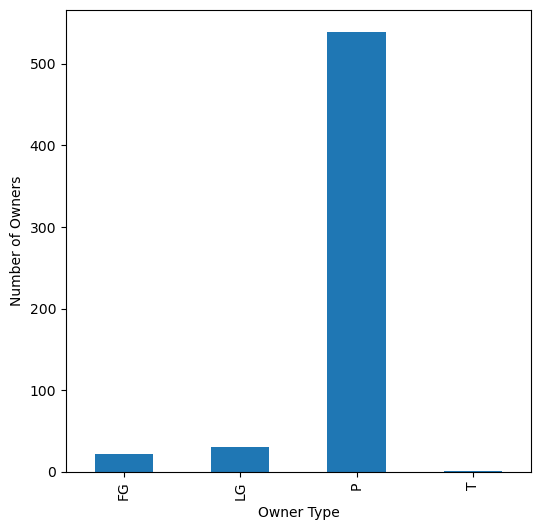

<Figure size 640x480 with 0 Axes>

In [68]:
count_chart = owner_fuel.plot(kind='bar', figsize=(6,6))

count_chart.set_xlabel("Owner Type")
count_chart.set_ylabel("Number of Owners")

plt.show()
plt.tight_layout()

In [66]:
# set index (how to get Owner Type code index + Fuel Type values) 

In [ ]:
# show owner types by electric vehicles 

In [80]:
elec_df = cleandf.loc[owner_df["Fuel Type Code"] == "ELEC"]
elec_df

KeyError: 'False: boolean label can not be used without a boolean index'

In [ ]:
# significance testing?

In [ ]:
# more time => API docs check out 